### Projeto End-to-End

### Etapas

1. Olhar para o quadro geral;
2. Obter os dados;
3. Descobrir e visualizar os dados para obter informações;
4. Preparar os dados para os algoritmos do Aprendizado de Máquina;
5. Selecionar e treinar um modelo;
6. Ajustar o seu modelo;
7. Apresentar sua solução;
8. Lançar, monitorar e manter seu sistema.


### Apendice B
#### Lista de Verificação do Projeto de Aprendizado de Máquina

1. Foque o problema e olhe para o quadro geral;
2. Obtenha os dados;
3. Explore os dados para obter insights;
4. Prepare os dados para melhor expor os padrões de dados subjacentes aos algoritmos do Aprendizado de Máquina;
5. Explore vários diferentes modelos e liste os melhores;
6. Ajuste seus modelos e combine-os em uma ótima solução;
7. Apresente sua solução;
8. Lance, monitore e faça a manutenção de seu sistema.

### Perguntas:

Bem, com toda essa informação você já está pronto para começar a projetar seu sistema. 
Primeiro, você precisa enquadrar o problema: será supervisionado, sem supervisão ou 
um Aprendizado por Reforço? Será uma tarefa de classificação, de regressão ou outra 
coisa? Você deve utilizar técnicas de aprendizado em lote ou online? Antes de ler, pause 
e tente responder para si estas perguntas.


### Respostas:

1. Superviosionado (variável respostas: valor médio do imóvel no bairro)
2. Regressão (prever valor numérico)
3. Lote (não é um variável tão volátil)

### links projetos:

https://github.com/ageron/handson-ml

### Extração dos Dados

In [2]:
import os
from six.moves import urllib
import tarfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

In [4]:
def fetch_house_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")

    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [5]:
fetch_house_data()

In [6]:
def load_housing(housing_path = HOUSING_PATH, file_name = 'housing.csv'):
    housing_path = os.path.join(housing_path, file_name)
    df = pd.read_csv(housing_path)
    return df

In [7]:
housing = load_housing()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

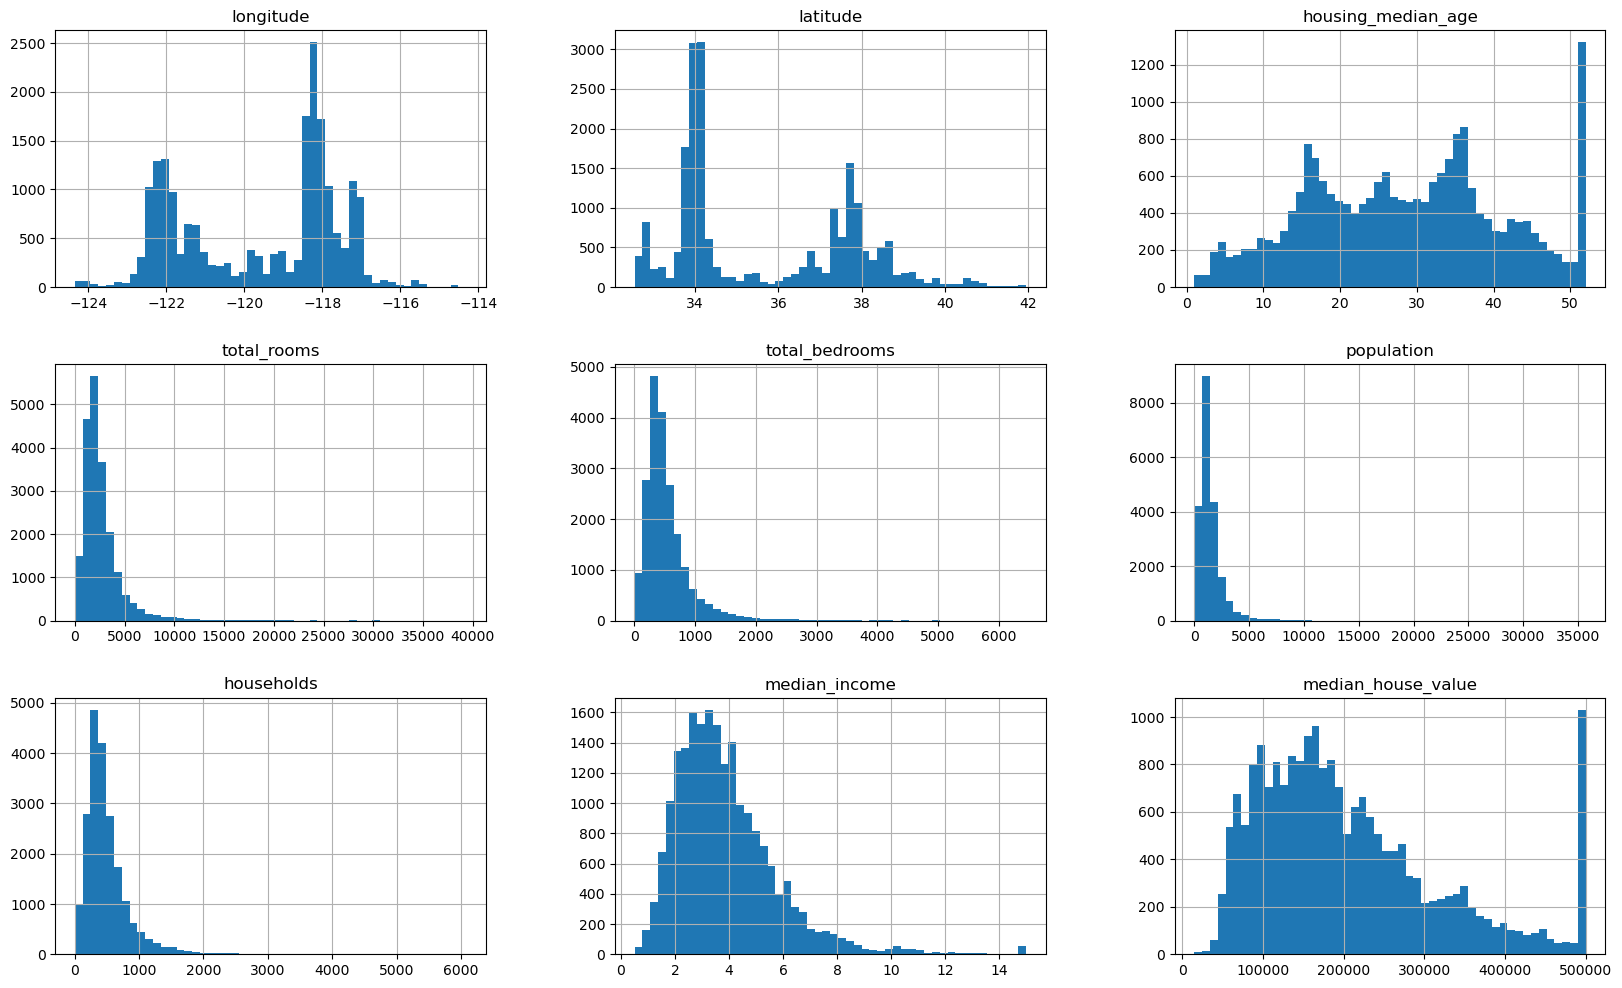

In [12]:
housing.hist(bins = 50, figsize=(20, 12))

### Criando um conjunto de teste

In [13]:
def split_train_test(data, test_ratio):
    shuffled_index = np.random.permutation(len(data))
    test_set_size = int(test_ratio*len(data))
    test_indices = shuffled_index[:test_set_size]
    train_indices = shuffled_index[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
train, test = split_train_test(housing, 0.2)

In [15]:
test.shape[0], train.shape[0]

(4128, 16512)

In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Por exemplo, a população dos EUA é composta por 51,3% de pessoas do sexo 
feminino e 48,7% do sexo masculino, de modo que uma pesquisa bem conduzida tentaria 
manter essa proporção na amostragem: 513 mulheres e 487 homens. Isso é chamado de 
amostragem estratificada: a população é dividida em subgrupos homogêneos, chamados 
de estratos, e o número certo de instâncias de cada estrato é amostrado para garantir 
que o conjunto de testes seja representativo da população em geral.

In [22]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [68]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'] = np.where(housing['income_cat'] > 5 , 5 , housing['income_cat'])

<AxesSubplot:>

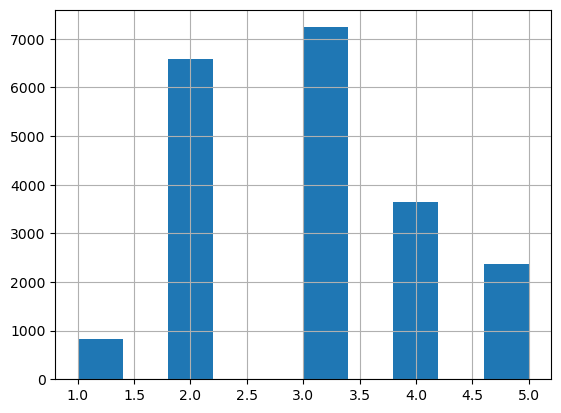

In [69]:
housing['income_cat'].hist()

In [70]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state=42)

print(sss)

for (train_index, test_index) in sss.split(housing, housing['income_cat']):
    strat_train = housing.iloc[train_index]
    strat_test = housing.iloc[test_index]


StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)


In [71]:
housing['income_cat'].value_counts(normalize=1)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [72]:
strat_train['income_cat'].value_counts(normalize=1)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114462
1.0    0.039789
Name: income_cat, dtype: float64

In [73]:
for set_ in (strat_train, strat_test):
    set_.drop(columns=['income_cat'], inplace = True)

C:\Users\99837631\AppData\Local\Temp\ipykernel_22928\2883153552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop(columns=['income_cat'], inplace = True)
C:\Users\99837631\AppData\Local\Temp\ipykernel_22928\2883153552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop(columns=['income_cat'], inplace = True)


### Exploração dos Dados

In [74]:
housing_exp = strat_train.copy()

In [75]:
housing_exp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


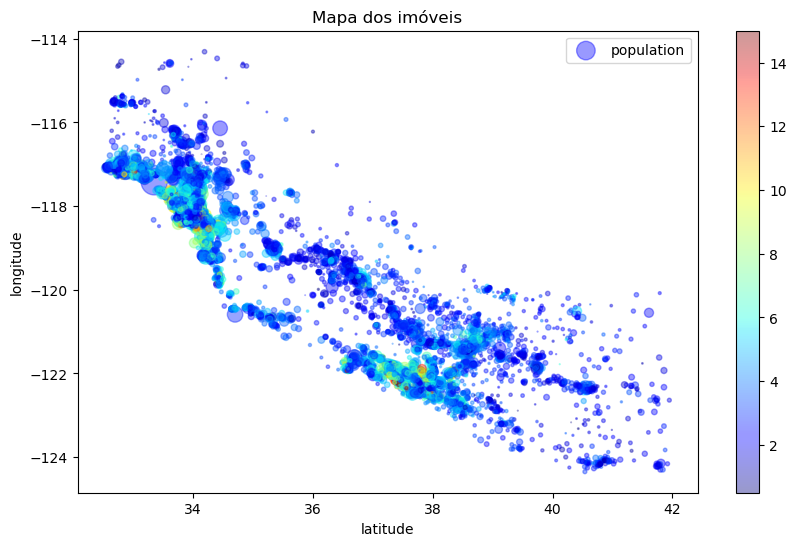

In [89]:
plt.figure(figsize=(10,6))
plt.scatter(housing_exp['latitude'], housing_exp['longitude'], alpha=0.4, s=housing_exp['population']/100, label ='population', c=housing_exp['median_income'], cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.legend()
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Mapa dos imóveis')
plt.show()

In [90]:
corr_matrix = housing_exp.corr()

In [93]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='households', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='households', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel

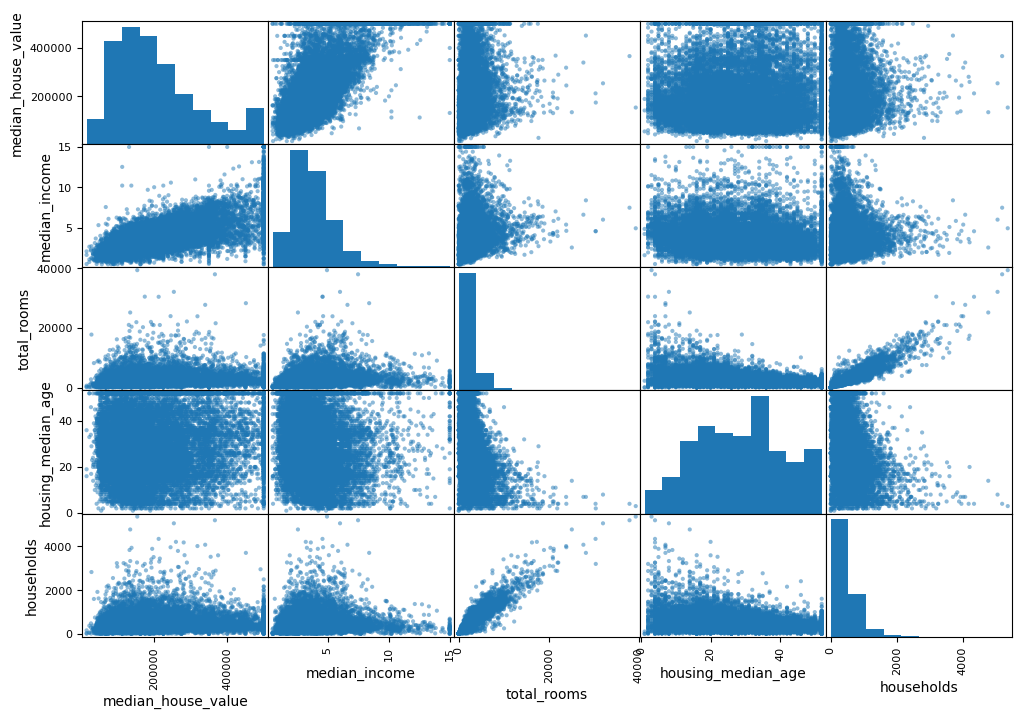

In [102]:
from pandas.plotting import scatter_matrix
atributtes = corr_matrix['median_house_value'].sort_values(ascending = False).head(5).index

scatter_matrix(housing_exp[atributtes], figsize=(12,8))

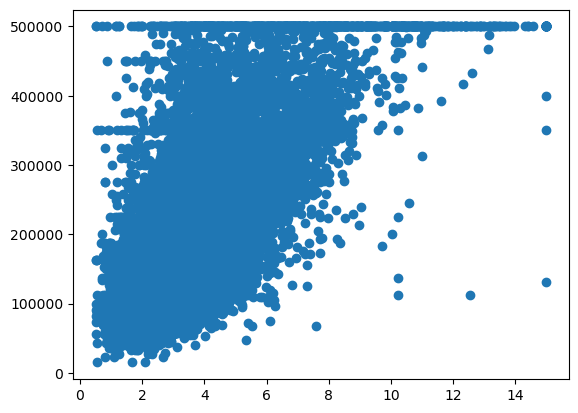

In [103]:
plt.scatter(housing_exp['median_income'], housing_exp['median_house_value'])

In [105]:
housing_exp['rooms_per_household'] = housing_exp['total_rooms'] / housing_exp['households']
housing_exp['bedrooms_per_rooms'] = housing_exp['total_bedrooms'] / housing_exp['total_rooms']
housing_exp['population_per_household'] = housing_exp['population'] / housing_exp['households']

In [107]:
corr_matrix = housing_exp.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_rooms         -0.259952
Name: median_house_value, dtype: float64

In [129]:
housing_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16354 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   ocean_proximity           16512 non-null  object 
 10  rooms_per_household       16512 non-null  float64
 11  bedrooms_per_rooms        16354 non-null  float64
 12  population_per_household  16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


### Prepare os Dados para Algoritmos do Aprendizado de Máquina

In [136]:
x_housing = strat_train.drop(columns=['median_house_value'])
y_housing = strat_train['median_house_value'].copy()

In [137]:
x_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [159]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

# imputar a mediana
median_total_bedrooms = x_housing['total_bedrooms'].median()
x_housing['total_bedrooms'].fillna(median_total_bedrooms, inplace = True)

In [160]:
# Separar cat_var, num_var

cat_var = ['ocean_proximity']
num_var = x_housing.drop(columns=['ocean_proximity']).columns

In [161]:
imputer.fit(x_housing[num_var])
X = imputer.transform(x_housing[num_var])

In [162]:
x_housing_tr = pd.DataFrame(X, columns=num_var)

In [163]:
x_housing[cat_var].value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

In [181]:
ohe = OneHotEncoder()
ohe.fit(x_housing[cat_var])
x_housing_cat = ohe.transform(x_housing[cat_var])
x_housing_cat.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [187]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([

    ("imputer", SimpleImputer(strategy='median')),
    ("Stand" , StandardScaler())
])


x_housing_tr_pip = num_pipeline.fit_transform(x_housing[num_var])

In [ ]:
# Exemplo ColumnsTransformer + Pipe

# Cria o column Tranformmer:

# t = [('std', StandardScaler(), numerical_features),
#      ('imput', SimpleImputer(strategy='median'), numerical_features),
#      ('ohe', OneHotEncoder(), categorical_features)]
# preprocessamento = ColumnTransformer(transformers=t)

# Cria o pipe e coloca o column transformer dentro:

# pipe = Pipeline(steps=[
#     ('preprocessamento', preprocessamento),
#     ('modelo', LogisticRegression())
# ])

# Apenas Aplicar ao modelo

# pipe.fit(X_train, y_train)
# y_pred = pipe.predict(X_test)
# confusion_matrix(y_test, y_pred)